# Exploratory Data Analysis on Student Performance 

##### The purpose of this project is to find out what factors are relevant to a student's ability to perform on a exam. The main questions to look at when creating this project are related to their parent's level of education and test preparation exams.

##### The dataset used for this analysis comes from https://www.kaggle.com/datasets/spscientist/students-performance-in-exams.

## 1. Importing packages and reading the dataset

In [2]:
import os
import re
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sb

In [14]:
#Opening the file
with open('StudentsPerformance.csv') as file:
    studperf_df = pd.read_csv(file)

#Checking the number of rows and columns
print('# of rows: {}, # of columns {}'.format(
    studperf_df.shape[0], studperf_df.shape[1]))

#Verifying that the file has been turned into a dataframe
studperf_df.head(20)

# of rows: 1000, # of columns 8


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


## 2. Data Cleaning and Formatting

In [17]:
#Copying the dataframe
new_per_df = studperf_df.copy()
working_columns = ['gender','race/ethnicity', 'parental level of education',
                   'lunch', 'test preparation course', 'math score', 
                   'reading score','writing score']
new_per_df = new_per_df[working_columns]
new_per_df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


### 2.1 Checking for invalid values, zero values, and replacing values

In [18]:
#Assessing invalid values
col = new_per_df.select_dtypes(include=['float64', 'int64']).columns
print(col)

invalid_list = list()
for i in col:
    y = any(x < 0 for x in new_per_df[i])
    if y == True:
        invalid_list.append(y)
print('# of negative values in the data frame {}.'.format(
    len(invalid_list)))


Index(['math score', 'reading score', 'writing score'], dtype='object')
# of negative values in the data frame 0.


In [19]:
#Inconsistent Values Check
print(new_per_df.describe())

       math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000


In [20]:
#Checking Zero values, Found one zero value
zero_values = (new_per_df[new_per_df.loc[0:]==0]).count().sum()
print('#of zero values in the dataset {}'.format(zero_values))

#Replacing the Zero Values with NaN, this should resolve the zero value issue
new_per_df.replace(0, np.nan, inplace=True)
new_zero = new_per_df[new_per_df.loc[0:]==0].count().sum()
print('#of zero values in the dataset  {}'.format(new_zero))

How many zero values are in this dataset? 1
How many zero values are in this dataset? 0


In [21]:
#Showing the different columns before cleaning (will help with formatting)
print(new_per_df.columns)

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')


### 2.2 Formatting the Data

In [23]:
def replace_remove_space(col):
    """Removing spaces between the column names and replacing them with '_'.

    Args:
        col: An argument that corresponds to the column name. 
    """
    cleaned_list = list()
    words_col = col.split()
    size = int(len(words_col))
    
    for i in range(len(words_col)):
        if i < size - 1:
            cleaned_list.append(words_col[i] + '_')
        else:
            cleaned_list.append(words_col[i])
    sep = ''
    result = sep.join(cleaned_list)
    
    return result

def replace_remove_sp_char(col):
    """Replaces special characters. This one checks all the cases in which a 
    special character may occur. 

    Args:
        col: The name of the column.
    Returns:
        The updated column name
    """
    
    if "'" in col:
        col = col.replace("'",'')
    if "," in col:
        col = col.replace(",",'')
    if "_-_" in col:
        col = col.replace("_-_",'_')
    if "/" in col:
        col = col.replace("/",'_')
    if ":" in col:
        col = col.replace(":",'')
    if "-" in col:
        col = col.replace("-",'_')
        
    return col

#Changing capitalized letters
new_colhead = list()
col_head = new_per_df.columns

for col in col_head:
    new_header = replace_remove_space(col)
    new_header = new_header.casefold()
    new_header = replace_remove_sp_char(new_header)
    
    new_colhead.append(new_header)

#Showing the new columns of the dataframe
new_per_df.columns = new_colhead
print(new_per_df.columns)

### 3. Exploratory Data Analysis and Visualization.

#### Q: Does the Parental Level of Education have an effect on the Student’s math, reading, and writing score?

In [109]:
#Making a new dataframe with only the columns we need
par_level_edu = new_per_df[
    ['parental_level_of_education', 
     'math_score', 'reading_score', 'writing_score']].sort_values('parental_level_of_education', ascending=True)

agg_par_level = par_level_edu.groupby(['parental_level_of_education']).mean()
agg_par_level

,math_score,reading_score,writing_score
parental_level_of_education,,,
associate's degree,67.882883,70.927928,69.896396
bachelor's degree,69.389831,73.000000,73.381356
high school,62.137755,64.704082,62.448980
master's degree,69.745763,75.372881,75.677966
some college,67.128319,69.460177,68.840708
some high school,63.853933,66.938547,64.888268


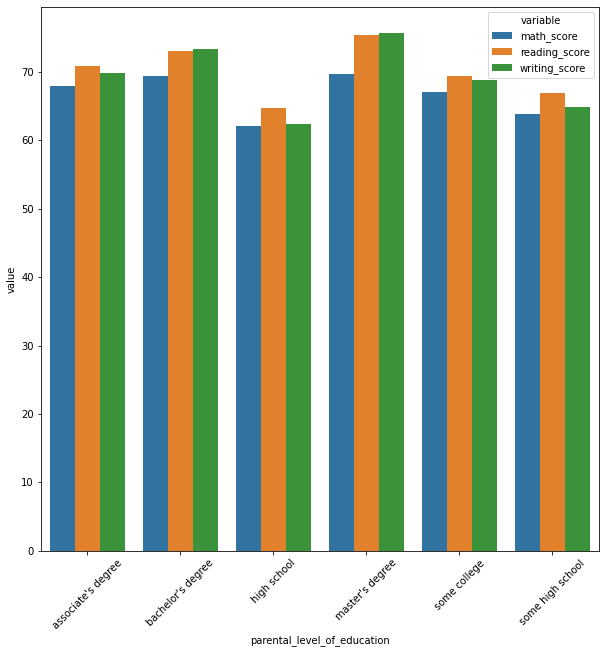

In [111]:
#Plotting the data
plot = agg_par_level.reset_index()
mean_plot = plot.melt(id_vars='parental_level_of_education')

plt.figure(figsize=(10,10))
sb.barplot(x='parental_level_of_education', y='value',data=mean_plot, hue='variable')
plt.xticks(rotation = 45)
plt.show()

#### Looking at the barplot above, it can be seen that students with parents who have a degree tend to perform better on all 3 sections of the exam. This is compared to students whose parents don't have a degree. In terms of point differential, it ranges from 1 - 10 points. One thing to point out within the groups of students whose parents have a degree, the higher the degree, the better the score (on average). With all of this data, it leads us to believe that parental level of education does have an impact on student's exam scores. 

#### An interesting trend to notice about the data for all groups is that the lowest score out of all 3 sections has occurred in the math section.  